In [25]:
import pandas as pd

In [26]:
df = pd.read_csv("StressLevelDataset.csv")
df.columns.tolist()
# df.head()
# df.info()
# df.isnull().sum()
df["stress_level"].unique().tolist()



[1, 2, 0]

In [27]:
def detect_outliers_iqr(df):
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower) | (df[col] > upper)]
        print(f"{col}: {len(outliers)} outliers found")

# Example usage
detect_outliers_iqr(df)


anxiety_level: 0 outliers found
self_esteem: 0 outliers found
mental_health_history: 0 outliers found
depression: 0 outliers found
headache: 0 outliers found
blood_pressure: 0 outliers found
sleep_quality: 0 outliers found
breathing_problem: 0 outliers found
noise_level: 173 outliers found
living_conditions: 62 outliers found
safety: 0 outliers found
basic_needs: 0 outliers found
academic_performance: 0 outliers found
study_load: 165 outliers found
teacher_student_relationship: 0 outliers found
future_career_concerns: 0 outliers found
social_support: 0 outliers found
peer_pressure: 0 outliers found
extracurricular_activities: 0 outliers found
bullying: 0 outliers found
stress_level: 0 outliers found


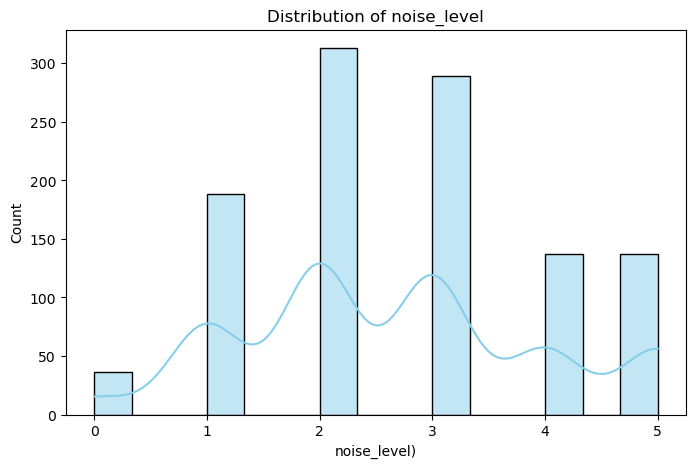

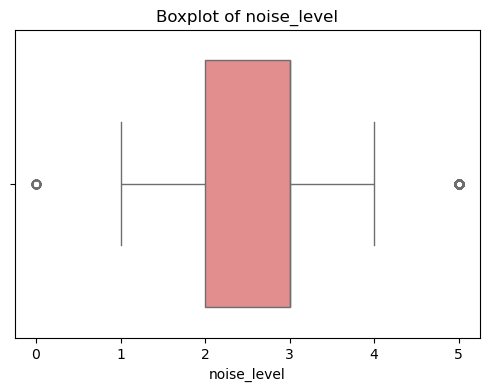

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
plt.figure(figsize=(8,5))
sns.histplot(df["noise_level"], bins=15, kde=True, color="skyblue")
plt.title("Distribution of noise_level")
plt.xlabel("noise_level)")
plt.ylabel("Count")
plt.show()

# Boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x=df["noise_level"], color="lightcoral")
plt.title("Boxplot of noise_level")
plt.xlabel("noise_level")
plt.show()


In [29]:
# Check summary statistics
print(df.describe())

# Check min/max for each column
# print(df.min())
# print(df.max())

       anxiety_level  self_esteem  mental_health_history   depression  \
count    1100.000000  1100.000000            1100.000000  1100.000000   
mean       11.063636    17.777273               0.492727    12.555455   
std         6.117558     8.944599               0.500175     7.727008   
min         0.000000     0.000000               0.000000     0.000000   
25%         6.000000    11.000000               0.000000     6.000000   
50%        11.000000    19.000000               0.000000    12.000000   
75%        16.000000    26.000000               1.000000    19.000000   
max        21.000000    30.000000               1.000000    27.000000   

          headache  blood_pressure  sleep_quality  breathing_problem  \
count  1100.000000     1100.000000    1100.000000        1100.000000   
mean      2.508182        2.181818       2.660000           2.753636   
std       1.409356        0.833575       1.548383           1.400713   
min       0.000000        1.000000       0.000000     

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [31]:
X = df.drop("stress_level", axis=1)
y = df["stress_level"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
model = RandomForestClassifier(
    n_estimators=500,   # more trees
    max_depth=None,     # allow trees to grow deep
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight="balanced",  # force fairness
    random_state=42
)
model.fit(X_train, y_train)



RandomForestClassifier(class_weight='balanced', n_estimators=500,
                       random_state=42)

In [33]:
y_pred = model.predict(X_test)


In [34]:
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8590909090909091


In [35]:
from sklearn.metrics import classification_report, confusion_matrix

# Classification Report: precision, recall, f1
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.84      0.84        76
           1       0.90      0.85      0.87        73
           2       0.84      0.89      0.86        71

    accuracy                           0.86       220
   macro avg       0.86      0.86      0.86       220
weighted avg       0.86      0.86      0.86       220

Confusion Matrix:
 [[64  4  8]
 [ 7 62  4]
 [ 5  3 63]]


In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall    = recall_score(y_test, y_pred, average='weighted')
f1        = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.8590909090909091
Precision: 0.8601554677206852
Recall: 0.8590909090909091
F1 Score: 0.8591838703453597


In [38]:
import json

metrics = {
    "accuracy": accuracy,
    "precision": precision,
    "recall": recall,
    "f1": f1
}

with open("metrics.json", "w") as f:
    json.dump(metrics, f)


In [15]:
# Testing;
new_data = {
    "anxiety_level": 9,          # very high
    "self_esteem": 1,            # very low
    "mental_health_history": 1,  # history present
    "depression": 9,             # very high
    "headache": 8,
    "blood_pressure": 160,       # high
    "sleep_quality": 1,          # very poor
    "breathing_problem": 1,
    "noise_level": 20,
    "living_conditions": 2,
    "safety": 2,
    "basic_needs": 2,
    "academic_performance": 3,   # struggling
    "study_load": 9,             # overloaded
    "teacher_student_relationship": 2,
    "future_career_concerns": 9, # very worried
    "social_support": 1,
    "peer_pressure": 9,
    "extracurricular_activities": 1,
    "bullying": 1
}


new_df_toPredict = pd.DataFrame([new_data])

# Use your trained RandomForestClassifier
prediction = model.predict(new_df_toPredict)

print("Predicted Stress Level:", prediction[0])
# proba = model.predict_proba(new_df_toPredict)
# print("Prediction Probabilities:", proba)


# from sklearn.metrics import classification_report, confusion_matrix

# y_pred = model.predict(X_test)
# print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))



Predicted Stress Level: 2


In [16]:
import joblib
joblib.dump(model, "StressLevel.pkl")

['StressLevel.pkl']

In [17]:
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler

# Load your trained model
model = joblib.load("StressLevel.pkl")


In [24]:
# Testing;
new_data = {
    "anxiety_level": 20,          # very high
    "self_esteem": 1,            # very low
    "mental_health_history": 1,  # history present
    "depression": 10,             # very high
    "headache": 0,
    "blood_pressure": 120,       # high
    "sleep_quality": 1,          # very poor
    "breathing_problem": 1,
    "noise_level": 20,
    "living_conditions": 2,
    "safety": 2,
    "basic_needs": 2,
    "academic_performance": 3,   # struggling
    "study_load": 2,             # overloaded
    "teacher_student_relationship": 2,
    "future_career_concerns": 9, # very worried
    "social_support": 1,
    "peer_pressure": 9,
    "extracurricular_activities": 1,
    "bullying": 1
}

# Convert into DataFrame
X_new = pd.DataFrame([new_data])

# Ensure same column order as training
X_new = X_new[model.feature_names_in_]

# Predict
pred_class = model.predict(X_new)[0]
pred_prob  = model.predict_proba(X_new)[0]
class_prob = pred_prob[pred_class] * 100
print("Predicted class:", pred_class)   # 0 = did not survive, 1 = survived
print("Predicted probabilities:", class_prob,"%")

Predicted class: 0
Predicted probabilities: 39.800000000000004 %
